In [14]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [15]:
Emotions= pd.read_csv('/kaggle/input/emotion/emotion (1).csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,labels
0,-258.990326,132.193741,5.314349,21.521330,-24.357752,-2.237025,-24.086287,-9.530801,-20.967497,-4.285268,...,-0.953883,1.146237,1.829600,2.893938,1.310414,1.626812,2.758013,4.257873,3.918041,male_happy
1,-258.667152,132.047682,5.236842,21.529129,-24.335813,-2.170860,-24.135509,-9.465332,-20.959675,-4.215839,...,-0.906946,1.140402,1.826270,2.867984,1.350153,1.576485,2.766849,4.228887,3.915566,male_happy
2,-301.181824,128.659897,4.380285,9.940308,-23.697367,-7.601327,-25.921268,-13.189119,-19.924520,-0.300373,...,3.321182,3.191138,3.419615,3.112536,1.654553,3.749860,5.546700,4.269989,1.401541,male_happy
3,-274.135437,142.405472,-2.322214,21.200804,-27.737436,-1.496183,-26.762552,-10.112954,-21.643480,-3.658734,...,-1.149690,1.346368,2.298612,3.353943,1.820001,2.129130,2.610373,4.910376,4.944275,male_happy
4,-274.135437,142.405472,-2.322214,21.200804,-27.737436,-1.496183,-26.762552,-10.112954,-21.643480,-3.658734,...,-1.149690,1.346368,2.298612,3.353943,1.820001,2.129130,2.610373,4.910376,4.944275,male_happy


In [16]:
X = Emotions.drop('labels',axis = 1)
Y = Emotions['labels']

In [17]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [18]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,shuffle = True)

In [20]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((48648, 40), (48648, 14), (12162, 40), (12162, 14))

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((48648, 40), (48648, 14), (12162, 40), (12162, 14))

In [22]:
x_train = x_train.reshape(x_train.shape[0], 40, 1)
x_test = x_test.reshape(x_test.shape[0], 40, 1)

In [23]:
from keras.layers import LSTM,BatchNormalization , GRU

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Embedding

In [25]:
model = Sequential()
model.add(LSTM(70, return_sequences=True, input_shape=(40, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(60))
model.add(Dense(14, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 40, 70)            20160     
                                                                 
 lstm_4 (LSTM)               (None, 40, 50)            24200     
                                                                 
 lstm_5 (LSTM)               (None, 60)                26640     
                                                                 
 dense_1 (Dense)             (None, 14)                854       
                                                                 
Total params: 71,854
Trainable params: 71,854
Non-trainable params: 0
_________________________________________________________________


In [27]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=65,verbose=1)

Epoch 1/100
749/749 [==============================] - 20s 14ms/step - loss: 1.8213 - accuracy: 0.3768 - val_loss: 1.5842 - val_accuracy: 0.4561
Epoch 2/100
749/749 [==============================] - 11s 15ms/step - loss: 1.5459 - accuracy: 0.4648 - val_loss: 1.4717 - val_accuracy: 0.4882
Epoch 3/100
749/749 [==============================] - 10s 13ms/step - loss: 1.4583 - accuracy: 0.4898 - val_loss: 1.4398 - val_accuracy: 0.4883
Epoch 4/100
749/749 [==============================] - 9s 12ms/step - loss: 1.3994 - accuracy: 0.5048 - val_loss: 1.3654 - val_accuracy: 0.5137
Epoch 5/100
749/749 [==============================] - 10s 13ms/step - loss: 1.3573 - accuracy: 0.5167 - val_loss: 1.3261 - val_accuracy: 0.5285
Epoch 6/100
749/749 [==============================] - 10s 13ms/step - loss: 1.3179 - accuracy: 0.5292 - val_loss: 1.2957 - val_accuracy: 0.5331
Epoch 7/100
749/749 [==============================] - 10s 13ms/step - loss: 1.2808 - accuracy: 0.5393 - val_loss: 1.2811 - val_acc

In [28]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

381/381 [==============================] - 2s 5ms/step - loss: 1.2715 - accuracy: 0.7257
Accuracy of our model on test data :  72.57030010223389 %


In [29]:
model_name = 'emotion_lstm_model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)   # adds file in folder
model.save(model_path)
print('Save model and weights at %s' % model_path)
model_json = model.to_json()
with open('model_json.json', 'w') as json_file:
    json_file.write(model_json)

Save model and weights at /kaggle/working/saved_models/emotion_lstm_model.h5


In [30]:
from keras.models import Sequential, Model, model_from_json

In [31]:
# loading json and model architecture
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('saved_models/emotion_lstm_model.h5')
print('Model is loaded from disk')

# keras optimiser
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.00001, decay=1e-6)
loaded_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose = 0)
print('%s: %.2f%%' % (loaded_model.metrics_names[1], score[1]*100))

Model is loaded from disk
accuracy: 72.57%


In [32]:
predicted = loaded_model.predict(x_test, batch_size = 16, verbose = 1)
predicted = predicted.argmax(axis = 1)
predicted

761/761 [==============================] - 4s 3ms/step


array([ 9, 13,  4, ...,  2,  5, 12])

In [33]:
len(predicted)

12162

In [34]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [37]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

381/381 [==============================] - 3s 5ms/step


In [38]:

df = pd.DataFrame(columns=['PredictedLabels', 'ActualLabels'])
df['PredictedLabels'] = y_pred.flatten()
df['ActualLabels'] = y_test.flatten()

In [39]:
df

,PredictedLabels,ActualLabels
0,male_fear,male_neutral
1,male_surprise,male_surprise
2,female_neutral,female_neutral
3,male_sad,male_sad
4,female_fear,female_fear
...,...,...
12157,female_happy,female_happy
12158,female_neutral,female_sad
12159,female_fear,female_fear
12160,female_sad,female_sad


In [40]:
df.to_csv('Predictions.csv', index = False)


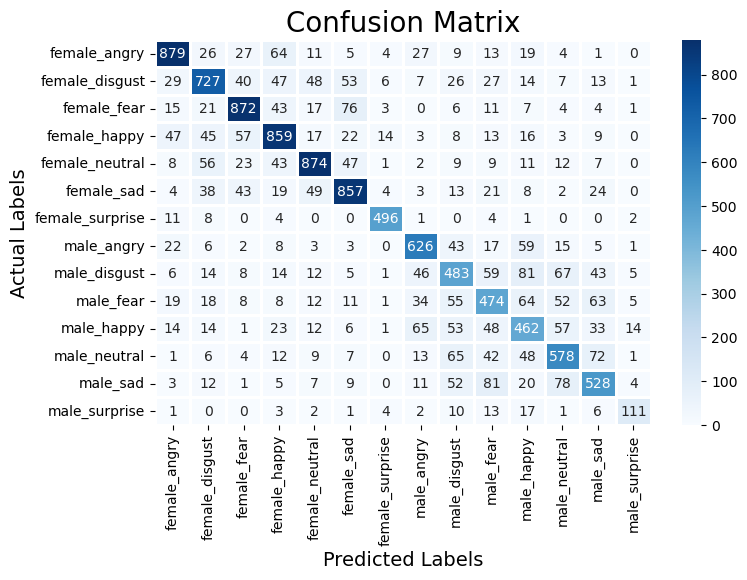

In [41]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,5))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

Classification report

In [42]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

   female_angry       0.83      0.81      0.82      1089
 female_disgust       0.73      0.70      0.71      1045
    female_fear       0.80      0.81      0.81      1080
   female_happy       0.75      0.77      0.76      1113
 female_neutral       0.81      0.79      0.80      1102
     female_sad       0.78      0.79      0.78      1085
female_surprise       0.93      0.94      0.93       527
     male_angry       0.75      0.77      0.76       810
   male_disgust       0.58      0.57      0.58       844
      male_fear       0.57      0.58      0.57       824
     male_happy       0.56      0.58      0.57       803
   male_neutral       0.66      0.67      0.67       858
       male_sad       0.65      0.65      0.65       811
  male_surprise       0.77      0.65      0.70       171

       accuracy                           0.73     12162
      macro avg       0.73      0.72      0.72     12162
   weighted avg       0.73   

In [43]:
import keras

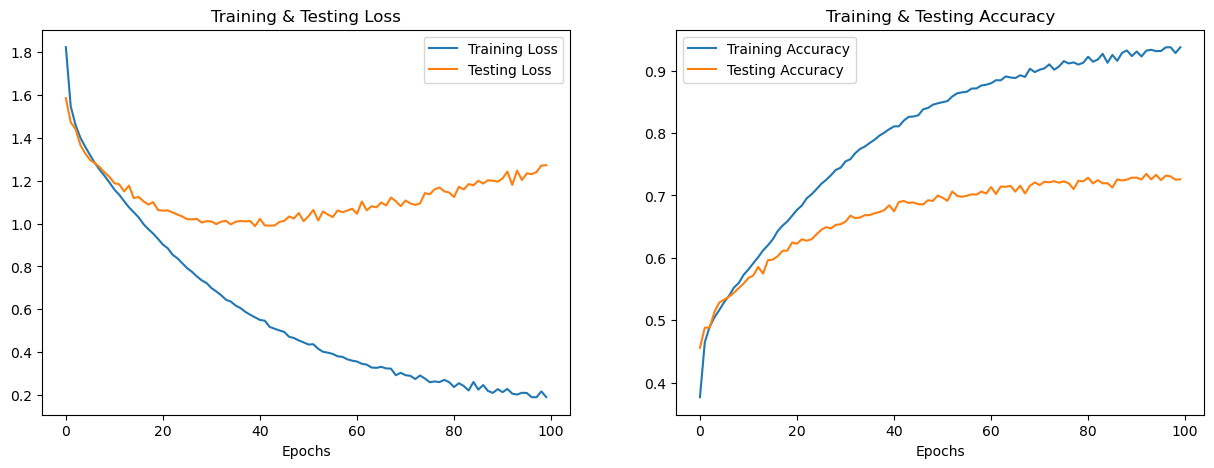

In [44]:

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc =history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(15,5)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()
     

Emotion accuracy

In [45]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.ActualLabels.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })


In [48]:
modidf['predictedvalues'] = modidf.PredictedLabels.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))


0.7427232363098175


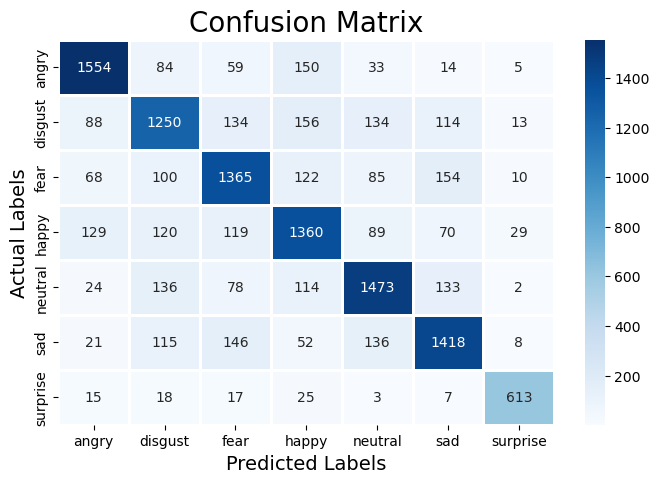

In [49]:
cm = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
plt.figure(figsize = (8,5))
x= pd.DataFrame(cm,  columns=(classes), index=(classes))
sns.heatmap(x, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Classification report 

In [47]:
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.82      0.82      0.82      1899
     disgust       0.69      0.66      0.67      1889
        fear       0.71      0.72      0.71      1904
       happy       0.69      0.71      0.70      1916
     neutral       0.75      0.75      0.75      1960
         sad       0.74      0.75      0.75      1896
    surprise       0.90      0.88      0.89       698

    accuracy                           0.74     12162
   macro avg       0.76      0.75      0.76     12162
weighted avg       0.74      0.74      0.74     12162

